### Problem statement
The Objectives of this project is

1. Visualize the situation od Age ,income and Score

2. Create clusters of customer based on their Age, Annual Income (k$) and Spending Score (1-100) without tuning and Visualize the each cluster

3. Create clusters of customer based on their Age, Annual Income (k$) and Spending Score (1-100) with tuning and Visualize the each cluster

 


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
df = pd.read_csv("mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'}, inplace=True)

In [5]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Viz

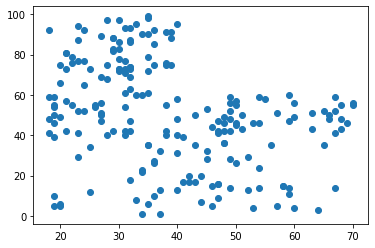

In [6]:
plt.scatter(df['Age'],df['score'])

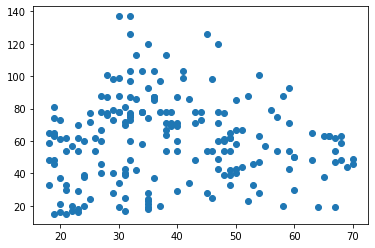

In [7]:
plt.scatter(df['Age'],df['income'])

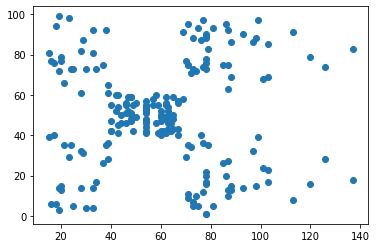

In [8]:
plt.scatter(df['income'],df['score'])

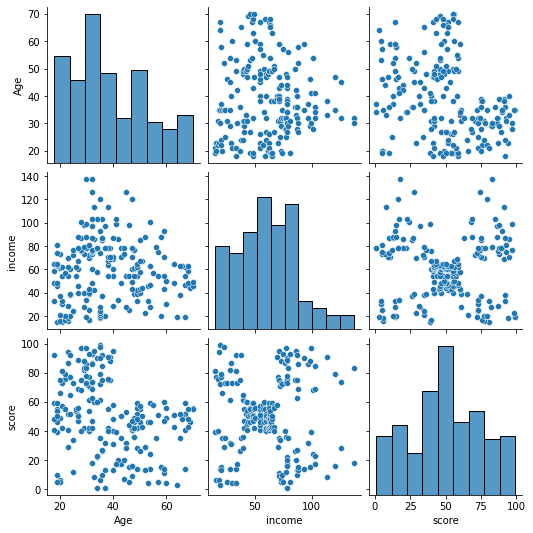

In [9]:
 
sns.pairplot(df[['Age','income','score']])

In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'income', 'score'], dtype='object')

In [11]:
df = df.drop(['CustomerID', 'Gender', ],axis=1)

In [12]:
df.head()

,Age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [13]:
import sklearn.cluster as cluster

In [14]:
kmeans = cluster.KMeans() # n_clusters = 8

In [15]:
kmeans.fit(df[['Age','income','score']])

KMeans()

In [16]:
kmeans.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 3, 0,
       3, 4, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7])

In [17]:
kmeans.predict([[20,14,38]])

array([3])

In [18]:
df['clusters'] = kmeans.predict(df[['Age','income','score']])
 

In [19]:
df.head()

,Age,income,score,clusters
0,19,15,39,3
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3


In [20]:
centers = kmeans.cluster_centers_
centers

array([[ 27.        ,  56.65789474,  49.13157895],
       [ 41.96      ,  79.64      ,  15.4       ],
       [ 32.86206897,  78.55172414,  82.17241379],
       [ 44.31818182,  25.77272727,  20.27272727],
       [ 25.27272727,  25.72727273,  79.36363636],
       [ 56.34090909,  53.70454545,  49.38636364],
       [ 41.        , 109.7       ,  22.        ],
       [ 32.2       , 109.7       ,  82.        ]])

# Viz

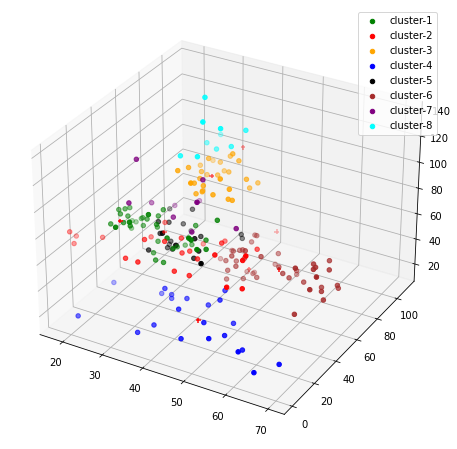

In [21]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]
df4 = df[df.clusters == 3]
df5 = df[df.clusters == 4]
df6 = df[df.clusters == 5]
df7 = df[df.clusters == 6]
df8 = df[df.clusters == 7]

plt.figure(figsize=(10,8))

ax = plt.axes(projection ="3d") 

ax.scatter(df1['Age'], df1['score'],df1['income'],color='green',label='cluster-1')
ax.scatter(df2['Age'], df2['score'],df2['income'],color='red',label='cluster-2')
ax.scatter(df3['Age'], df3['score'],df3['income'],color='orange',label='cluster-3')
ax.scatter(df4['Age'], df4['score'],df4['income'],color='blue',label='cluster-4')
ax.scatter(df5['Age'], df5['score'],df5['income'],color='black',label='cluster-5')
ax.scatter(df6['Age'], df6['score'],df6['income'],color='brown',label='cluster-6')
ax.scatter(df7['Age'],df7['score'],df7['income'],color='purple',label='cluster-7')
ax.scatter(df8['Age'], df8['score'],df8['income'],color='cyan',label='cluster-8')

ax.scatter(centers[:,0],centers[:,1],centers[:,2], color='red', marker='+')

ax.legend()


# Optimizing Cluster

In [22]:
from sklearn.cluster import KMeans

In [23]:
wcss = []
clusters = range(1,20)
for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Age','income','score']])
    wcss.append(kmeans.inertia_)

C:\Users\Binu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
wcss

[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75350.77917248776,
 58300.443321590676,
 51118.949931647316,
 44310.50582506425,
 40616.41312064748,
 37532.17667332668,
 34511.19971136369,
 32378.535847390158,
 29694.69266566768,
 28014.106744834713,
 26272.307654600318,
 25313.326343309254,
 23982.82808267584,
 22359.897860472876,
 21208.92117555648]

Text(0, 0.5, 'Sum of squared error')

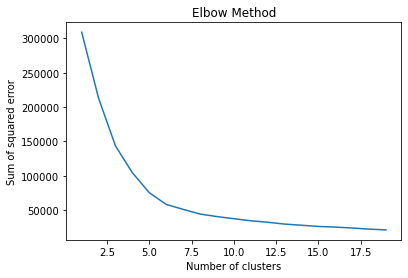

In [25]:
plt.plot(clusters,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')

# Knee Locator

In [26]:
#!pip install kneed

In [27]:
from kneed import KneeLocator

In [28]:
kneedle = KneeLocator(clusters,wcss,curve='convex', direction='decreasing')

In [29]:
optimal_cluster = kneedle.knee

In [30]:
optimal_cluster

6

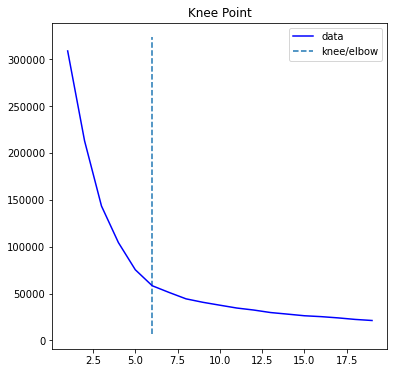

In [31]:
kneedle.plot_knee()

# After tuning

In [32]:
kmeans = cluster.KMeans(n_clusters = 6) # total number of cluster = 6

In [33]:
kmeans.fit(df[['Age','income','score']])

KMeans(n_clusters=6)

In [34]:
kmeans.labels_

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 1, 3, 1, 4,
       5, 3, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 2, 4, 2, 0, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [35]:
center = kmeans.cluster_centers_
center

array([[41.68571429, 88.22857143, 17.28571429],
       [56.15555556, 53.37777778, 49.08888889],
       [32.69230769, 86.53846154, 82.12820513],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [44.14285714, 25.14285714, 19.52380952]])

In [36]:
df['clusters'] = kmeans.predict(df[['Age','income','score']])

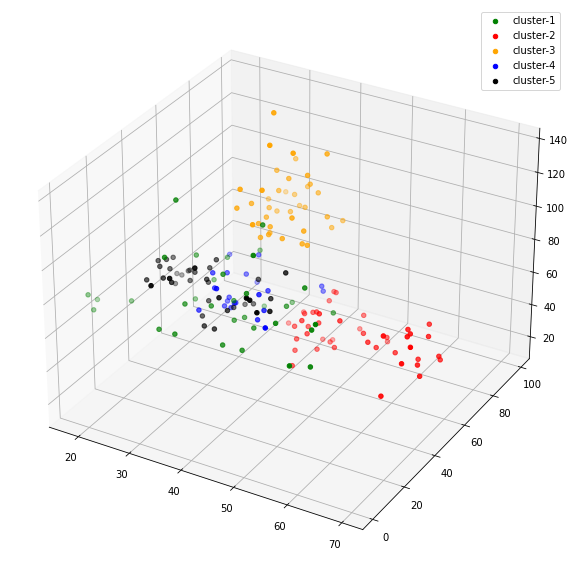

In [37]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]
df4 = df[df.clusters == 3]
df5 = df[df.clusters == 4]

plt.figure(figsize=(10,12))

ax = plt.axes(projection ="3d")

ax.scatter3D(df1["Age"],df1['score'],df1['income'],color='green',label='cluster-1')
ax.scatter3D(df2["Age"],df2['score'],df2['income'],color='red',label='cluster-2')
ax.scatter3D(df3["Age"],df3['score'],df3['income'],color='orange',label='cluster-3')
ax.scatter3D(df4["Age"],df4['score'],df4['income'],color='blue',label='cluster-4')
ax.scatter3D(df5["Age"],df5['score'],df5['income'],color='black',label='cluster-5') 
 

#ax.scatter3D(centers[:,0], centers[:,1],centers[:,2],color='navy', marker='+')

plt.legend()
